In [ ]:
import pandas as pd
df = pd.read_excel('online_retailer.xlsx')
df.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43


In [ ]:
df.isnull().sum()

,0
Purchasing behaviour,0
Gender,0
Age,0
Time spent in online shop,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Purchasing behaviour']=le.fit_transform(df['Purchasing behaviour'])
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
feature_cols=['Gender','Age','Time spent in online shop']
x = df[feature_cols]
y = df['Purchasing behaviour']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(19, 3)

(19,)

(5, 3)

(5,)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)
Accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',Accuracy)

confusion matrix: [[0 0 0]
 [0 1 0]
 [2 0 2]]
Accuracy: 0.6


<Axes: xlabel='Predict', ylabel='Actual'>

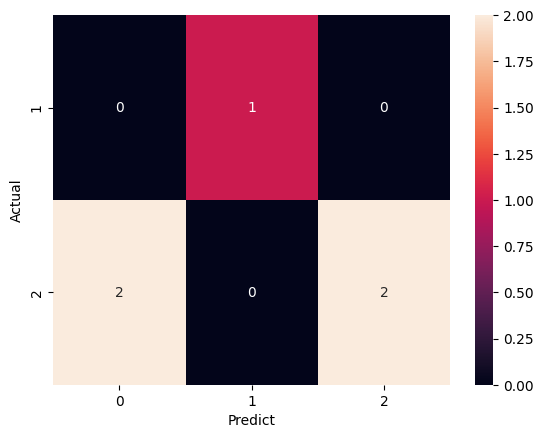

In [ ]:
import seaborn as sn
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predict'])
sn.heatmap(conf_mat,annot=True)